In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#引入数据集
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.mnist.load_data()

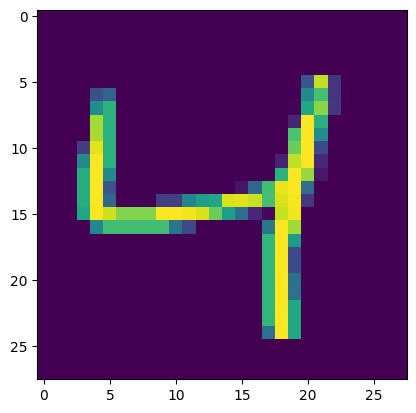

In [5]:
plt.imshow(train_image[2])

In [6]:
#独热处理
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [7]:
#模型搭建
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(32,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))#输出层

#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=(28,28)))#扁平化图像，转化为向量处理
#model.add(tf.keras.layers.Dense(128,activation = 'relu'))
#model.add(tf.keras.layers.Dropout(0.5))#用于减少过拟合
#model.add(tf.keras.layers.Dense(128,activation = 'relu'))
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Dense(128,activation = 'relu'))
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Dense(10,activation = 'softmax'))#将结果转化为概率分布

In [8]:
#编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']
             )

In [9]:
#训练模型
history = model.fit(train_image,train_label_onehot,
                    epochs=5,
                    validation_data=(test_image,test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 2s 860us/step - loss: 1.9154 - acc: 0.6113 - val_loss: 0.8280 - val_acc: 0.7969
Epoch 2/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.6623 - acc: 0.8462 - val_loss: 0.5658 - val_acc: 0.8771
Epoch 3/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.4686 - acc: 0.8884 - val_loss: 0.4403 - val_acc: 0.9028
Epoch 4/5
1875/1875 [==============================] - 2s 841us/step - loss: 0.3714 - acc: 0.9102 - val_loss: 0.3456 - val_acc: 0.9228
Epoch 5/5
1875/1875 [==============================] - 2s 814us/step - loss: 0.3208 - acc: 0.9205 - val_loss: 0.3164 - val_acc: 0.9250


<function matplotlib.pyplot.legend(*args, **kwargs)>

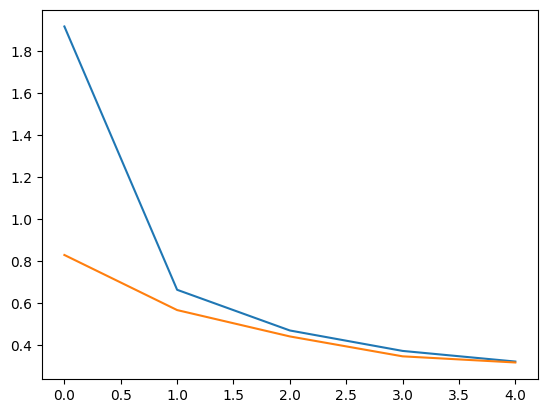

In [10]:
plt.plot(history.epoch,history.history.get('loss') ,label='loss')
plt.plot(history.epoch,history.history.get('val_loss') ,label='val_loss')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

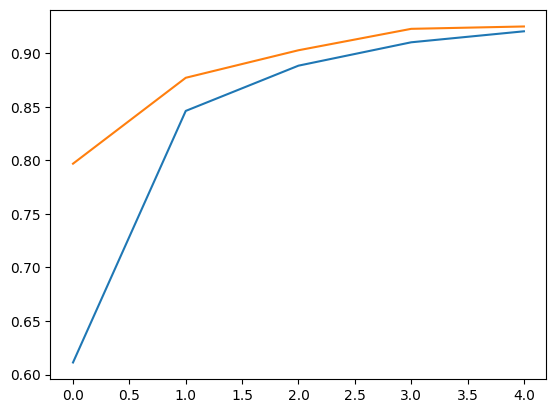

In [11]:
plt.plot(history.epoch,history.history.get('acc') ,label='acc')
plt.plot(history.epoch,history.history.get('val_acc') ,label='val_acc')
plt.legend